<a href="https://colab.research.google.com/github/zly554411-arch/ECON3916-Statistical-Machine-Learning/blob/main/Lab%202/Lab_2_FRED_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the FRED API library
!pip install fredapi

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='8aa2b42808ee42e6c3dd55a4fcd38909')

In [3]:
# 1. Fetch the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [4]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


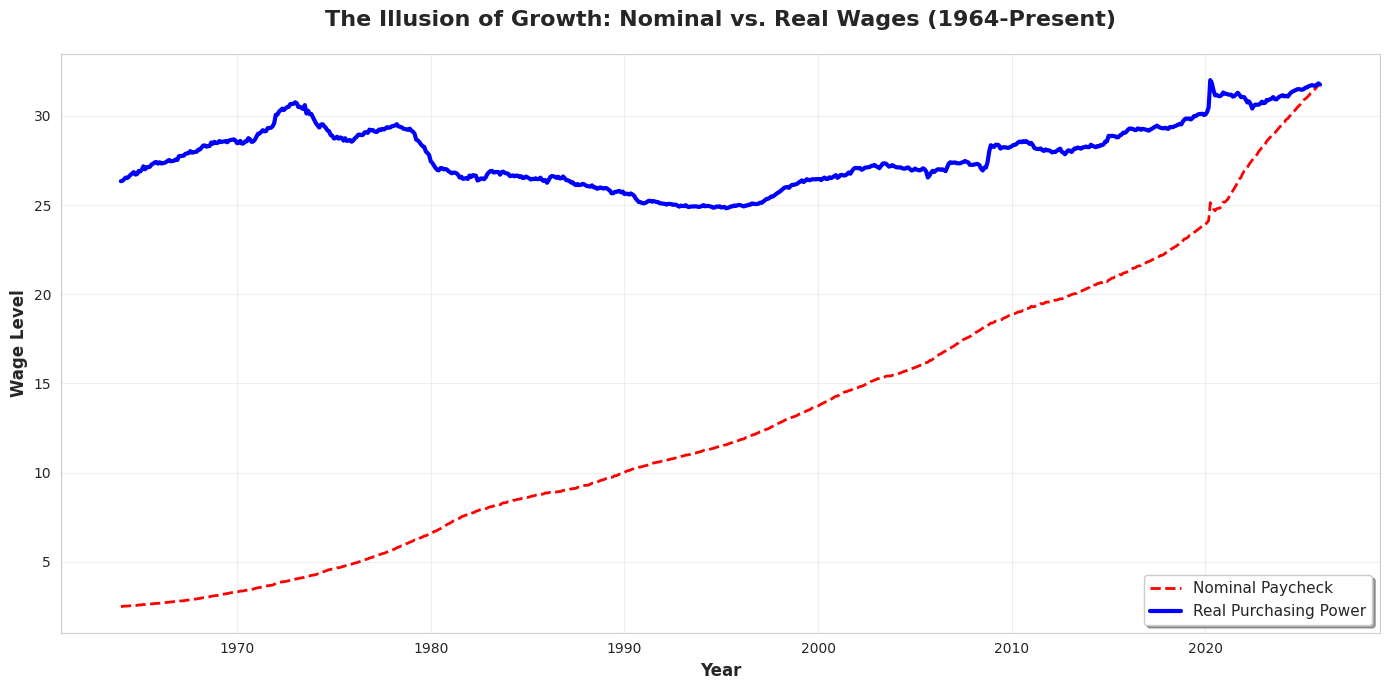

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style
sns.set_style("whitegrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot both wage series
ax.plot(df.index, df['Nominal_Wage'],
        linestyle='--',
        color='red',
        linewidth=2,
        label='Nominal Paycheck')

ax.plot(df.index, df['Real_Wage'],
        linestyle='-',
        color='blue',
        linewidth=3,
        label='Real Purchasing Power')

# Add title and labels
ax.set_title('The Illusion of Growth: Nominal vs. Real Wages (1964-Present)',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Wage Level', fontsize=12, fontweight='bold')

# Add legend
ax.legend(loc='best', fontsize=11, frameon=True, shadow=True)

# Add annotation for 2020 pandemic effect
# Find approximate location of 2020 spike
pandemic_year = '2020'
if pandemic_year in df.index.astype(str):
    pandemic_idx = df.index[df.index.astype(str).str.contains(pandemic_year)][0]
    pandemic_value = df.loc[pandemic_idx, 'Real_Wage']

    ax.annotate('Pandemic Composition Effect',
                xy=(pandemic_idx, pandemic_value),
                xytext=(pandemic_idx, pandemic_value * 1.1),
                arrowprops=dict(facecolor='black',
                              shrink=0.05,
                              width=2,
                              headwidth=8),
                fontsize=11,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='yellow',
                         alpha=0.7))

# Improve grid appearance
ax.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

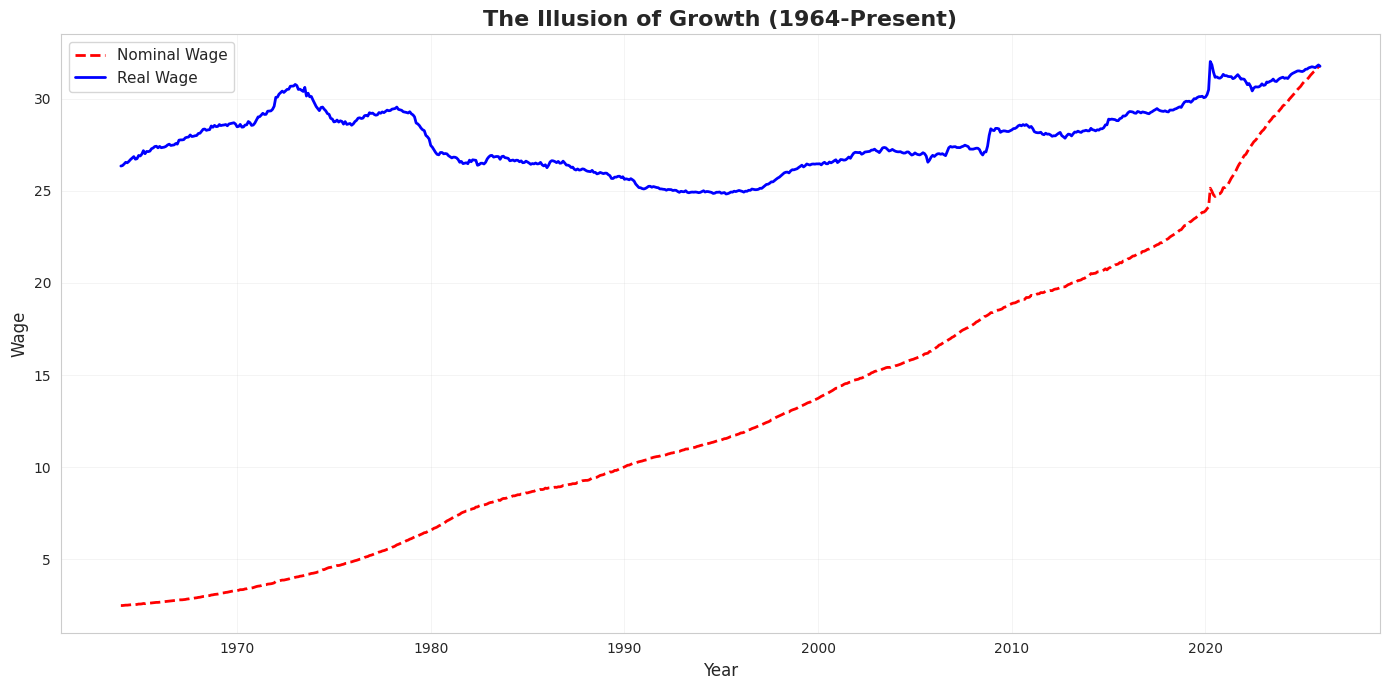

In [6]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot both wage series
ax.plot(df.index, df['Nominal_Wage'],
        linestyle='--',
        color='red',
        linewidth=2,
        label='Nominal Wage')

ax.plot(df.index, df['Real_Wage'],
        linestyle='-',
        color='blue',
        linewidth=2,
        label='Real Wage')

# Add title and labels
ax.set_title('The Illusion of Growth (1964-Present)',
             fontsize=16,
             fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Wage', fontsize=12)

# Add legend
ax.legend(loc='best', fontsize=11)

# Add annotation for 2020 pandemic effect
# Find 2020 in the index
pandemic_year = '2020'
if pandemic_year in df.index.astype(str):
    pandemic_idx = df.index[df.index.astype(str).str.contains(pandemic_year)][0]
    pandemic_value = df.loc[pandemic_idx, 'Real_Wage']

    ax.annotate('Pandemic Composition Effect',
                xy=(pandemic_idx, pandemic_value),
                xytext=(pandemic_idx, pandemic_value * 1.08),
                arrowprops=dict(facecolor='black',
                              shrink=0.05,
                              width=1.5,
                              headwidth=7),
                fontsize=10,
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='lightyellow',
                         edgecolor='black',
                         alpha=0.8))

# Add grid
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

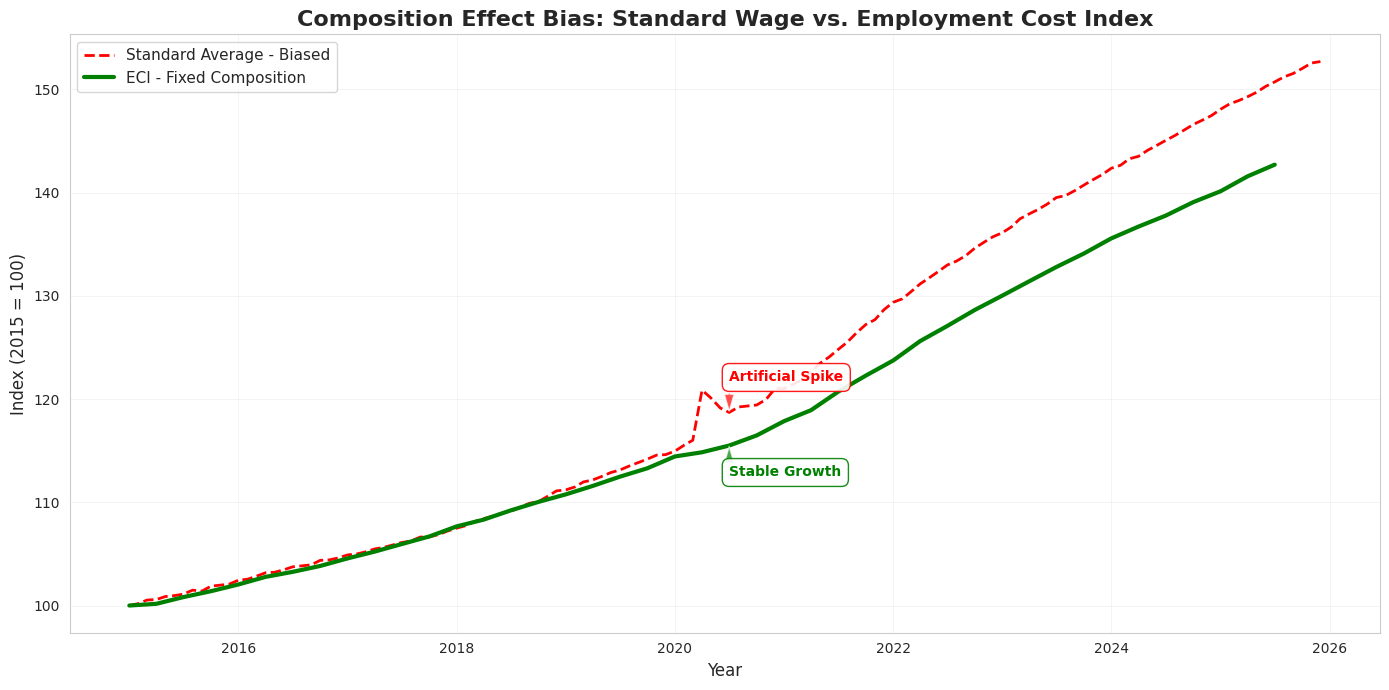

In [7]:
import matplotlib.pyplot as plt

# Fetch the Employment Cost Index data
eci = fred.get_series('ECIWAG')

# Filter both series to 2015 onwards
wages_filtered = wages[wages.index >= '2015-01-01']
eci_filtered = eci[eci.index >= '2015-01-01']

# Rebase both series to 100 (first value = 100)
wages_rebased = (wages_filtered / wages_filtered.iloc[0]) * 100
eci_rebased = (eci_filtered / eci_filtered.iloc[0]) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Plot both series
ax.plot(wages_rebased.index, wages_rebased,
        linestyle='--',
        color='red',
        linewidth=2,
        label='Standard Average - Biased')

ax.plot(eci_rebased.index, eci_rebased,
        linestyle='-',
        color='green',
        linewidth=3,
        label='ECI - Fixed Composition')

# Add title and labels
ax.set_title('Composition Effect Bias: Standard Wage vs. Employment Cost Index',
             fontsize=16,
             fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Index (2015 = 100)', fontsize=12)

# Add legend
ax.legend(loc='best', fontsize=11)

# Add annotations for 2020 divergence
# Find 2020 values
pandemic_year = '2020'
wages_2020 = wages_rebased[wages_rebased.index.astype(str).str.contains(pandemic_year)]
eci_2020 = eci_rebased[eci_rebased.index.astype(str).str.contains(pandemic_year)]

if len(wages_2020) > 0 and len(eci_2020) > 0:
    # Get mid-2020 values for annotation
    wages_2020_idx = wages_2020.index[len(wages_2020)//2]
    wages_2020_val = wages_2020.iloc[len(wages_2020)//2]

    eci_2020_idx = eci_2020.index[len(eci_2020)//2]
    eci_2020_val = eci_2020.iloc[len(eci_2020)//2]

    # Annotate the artificial spike in standard wages
    ax.annotate('Artificial Spike',
                xy=(wages_2020_idx, wages_2020_val),
                xytext=(wages_2020_idx, wages_2020_val + 3),
                arrowprops=dict(facecolor='red',
                              shrink=0.05,
                              width=1.5,
                              headwidth=7,
                              alpha=0.7),
                fontsize=10,
                color='red',
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='white',
                         edgecolor='red',
                         alpha=0.9))

    # Annotate the stable growth in ECI
    ax.annotate('Stable Growth',
                xy=(eci_2020_idx, eci_2020_val),
                xytext=(eci_2020_idx, eci_2020_val - 3),
                arrowprops=dict(facecolor='green',
                              shrink=0.05,
                              width=1.5,
                              headwidth=7,
                              alpha=0.7),
                fontsize=10,
                color='green',
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='white',
                         edgecolor='green',
                         alpha=0.9))

# Add grid
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()